In [ ]:
import matplotlib.pyplot as plt
from astropy.cosmology import FlatLambdaCDM
import numpy as np
from slsim.Sources.source import Source
from slsim.Deflectors.deflector import Deflector
from slsim.lens import Lens
from slsim.LOS.los_individual import LOSIndividual
from slsim.image_simulation import lens_image, rgb_image_from_image_list

## Single lens simulation
This notebook walks through the basics of simulating a galaxy-galaxy strong lens using users
own lens parameters.

The notebook goes in three steps:

1. Prepare source and deflector dict of your lens. 
2. Initialize Source, Deflector, and LOSIndividual class
3. Initialize Lens class
4. Use Lens class from 3 in image simulation module to simulate image

## Prepare source and deflector dict of your lens. 

In [105]:
# define a cosmology
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [ ]:
# Source dict. You can also proviide magnitude in single band.
source_dict={'z': 1.5,
  'angular_size': 0.10887651129362959,
  'mag_g': 20.5,
  'mag_r':20,
  'mag_i': 20.2,
  'mag_z': 20.1,
  'mag_y': 20,
  'e1': 0.0,
  'e2': 0.0,
  'n_sersic': 1.5547096361698418,
  "center_x": 0.056053505877290584,
  "center_y": -0.08071283196326566}
# Deflector dict. You can also proviide magnitude in single band.
deflector_dict={'z':0.5,
  'angular_size': 0.09604418906529916,
  'mag_g':19.0,
  'mag_r': 17.5,
  'mag_i': 17,
  'mag_z':16.7,
  'mag_y':26.5,
  'theta_E':1.099908087840821,
  'e1_light': 0.09096489106609575,
  'e2_light': 0.1489400739802363,
  'e1_mass': 0.1082427319496781,
  'e2_mass': 0.10051583213026649,
  "gamma_pl": 2.0,
  'n_sersic': 2.4362388918558664,
  "center_x": 0.10039720005025651,
  "center_y": -0.0002092046265491892,}

## Initialize Source, Deflector, and LOSIndividual class

In [197]:
source = Source(
                source_dict=source_dict,
                cosmo=cosmo,
                source_type="extended",
                light_profile="single_sersic",
            )
deflector = Deflector(
                deflector_type="EPL",
                deflector_dict=deflector_dict,
            )
los_class = LOSIndividual(kappa=0, gamma=[-0.005061965833762263, 0.028825761226555197])

## Initialize Lens class

In [198]:
# This is your lens. it contains all the information about your lensing configuration.
lens_class=Lens(source_class=source, deflector_class=deflector, cosmo=cosmo, los_class=los_class)

## Use Lens class from 3 in image simulation module to simulate image

In [ ]:
# load your psf kernel and transform matrix. If you have your own psf, please provide
# it here. These psf kernel can be downloded from:
# https://github.com/LSST-strong-lensing/data_public/tree/main/dp0_images_data_for_slsim_image_validation
path_i = "/Users/narayankhadka/downloads/dc2_galaxy_2_kernel_i.npy"
path_r = "/Users/narayankhadka/downloads/dc2_galaxy_2_kernel_r.npy"
path_g = "/Users/narayankhadka/downloads/dc2_galaxy_2_kernel_g.npy"
psf_kernel_i =np.load(path_i)
psf_kernel_r = np.load(path_r)
psf_kernel_g = np.load(path_g)

# let's set pixel to angle transform matrix.
transform_matrix = np.array([[0.2, 0], [0, 0.2]])
# Please download this data from data_public repo: 
# https://github.com/LSST-strong-lensing/data_public/tree/main/dp0_images_data_for_slsim_image_validation
dp0_variance_i = np.load("/Users/narayankhadka/downloads/dc2_galaxy_2_variance_i.npy")
dp0_variance_g = np.load("/Users/narayankhadka/downloads/dc2_galaxy_2_variance_g.npy")
dp0_variance_r = np.load("/Users/narayankhadka/downloads/dc2_galaxy_2_variance_r.npy")

In [218]:
##lsst background noise. One can use these properties directly from dp0 images. Here, 
# I have estimated from a random sky patch.
std_i = np.sqrt(np.mean(dp0_variance_i))
std_r = np.sqrt(np.mean(dp0_variance_r))
std_g = np.sqrt(np.mean(dp0_variance_g))

In [226]:
std_i, std_r, std_g

(0.05774509, 0.03247451, 0.028600888)

## Simulate images in different bands

In [ ]:
image_i=lens_image(
            lens_class=lens_class,
            band="i",
            mag_zero_point=27, #lsst coadd images have zero point magnitude of 27.
            num_pix=61,
            psf_kernel=psf_kernel_i,
            transform_pix2angle=transform_matrix,
            exposure_time=300, # one can provide None
            t_obs=None,
            std_gaussian_noise=std_i, # one can provide None
            with_source=True,
            with_deflector=True,
        )
image_r=lens_image(
        lens_class=lens_class,
        band="r",
        mag_zero_point=27,
        num_pix=61,
        psf_kernel=psf_kernel_r,
        transform_pix2angle=transform_matrix,
        exposure_time=300,
        t_obs=None,
        std_gaussian_noise=std_r,
        with_source=True,
        with_deflector=True,
    )

image_g=lens_image(
        lens_class=lens_class,
        band="g",
        mag_zero_point=27,
        num_pix=61,
        psf_kernel=psf_kernel_g,
        transform_pix2angle=transform_matrix,
        exposure_time=300, 
        t_obs=None,
        std_gaussian_noise=std_g,
        with_source=True,
        with_deflector=True,
)

/Users/narayankhadka/lenstronomy/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(


In [228]:
# Simulate rgb color image
rgb_image = rgb_image_from_image_list([image_i, image_r, image_g], stretch=0.5)

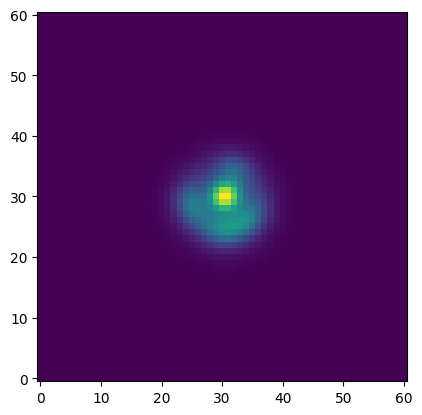

In [230]:
## see r-namd image. LensI picked here is very bright. So, background noise is almost 
# not visible.
plt.imshow(image_r, origin="lower")